# Recommender System
## Dataset link - [Click here](www.kaggle.com)

In [1]:
import pandas as pd
import numpy as np

## Reading the datafile

In [2]:
data = pd.read_csv("IMDB Movie Recommender System/imdb.csv" , error_bad_lines=False)

b'Skipping line 66: expected 44 fields, saw 46\nSkipping line 111: expected 44 fields, saw 45\nSkipping line 198: expected 44 fields, saw 45\nSkipping line 222: expected 44 fields, saw 46\nSkipping line 278: expected 44 fields, saw 45\nSkipping line 396: expected 44 fields, saw 45\nSkipping line 403: expected 44 fields, saw 45\nSkipping line 421: expected 44 fields, saw 45\nSkipping line 437: expected 44 fields, saw 45\nSkipping line 462: expected 44 fields, saw 46\nSkipping line 491: expected 44 fields, saw 45\nSkipping line 515: expected 44 fields, saw 45\nSkipping line 529: expected 44 fields, saw 45\nSkipping line 530: expected 44 fields, saw 45\nSkipping line 558: expected 44 fields, saw 45\nSkipping line 623: expected 44 fields, saw 45\nSkipping line 646: expected 44 fields, saw 45\nSkipping line 663: expected 44 fields, saw 46\nSkipping line 713: expected 44 fields, saw 45\nSkipping line 730: expected 44 fields, saw 47\nSkipping line 791: expected 44 fields, saw 45\nSkipping lin

In [3]:
data

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,titles04/index.html.9989,tt0672488,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,http://www.imdb.com/title/tt0672488/,7.7,135.0,1440.0,2005.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
14328,titles04/index.html.9992,tt0675644,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,http://www.imdb.com/title/tt0675644/,7.3,8.0,5400.0,1957.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
14329,titles04/index.html.9994,tt0679222,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,http://www.imdb.com/title/tt0679222/,7.0,20.0,3600.0,1996.0,video.episode,...,0,0,0,0,0,0,1,0,0,0
14330,titles04/index.html.9995,tt0680064,Providence All the King's Men (TV Episode 2002),providence all the king s men tv episode,http://www.imdb.com/title/tt0680064/,NaN,NaN,3600.0,2002.0,video.episode,...,0,0,0,0,0,0,0,0,0,0


## Dropping the columns which are not that useful for system/model.

In [4]:
data = data.drop(["fn","tid","url"], axis = 1)

In [5]:
data

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550.0,3240.0,1921.0,video.movie,1,0,19,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319.0,5700.0,1925.0,video.movie,2,1,35,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007.0,9180.0,1927.0,video.movie,3,4,67,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521.0,6420.0,1926.0,video.movie,1,1,53,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057.0,5220.0,1931.0,video.movie,2,0,38,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,7.7,135.0,1440.0,2005.0,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14328,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,7.3,8.0,5400.0,1957.0,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14329,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,7.0,20.0,3600.0,1996.0,video.episode,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14330,Providence All the King's Men (TV Episode 2002),providence all the king s men tv episode,NaN,NaN,3600.0,2002.0,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#The max values of each column
data.max()

title                 Überleben! (1993)
imdbRating                          9.9
ratingCount                           1
type                                  2
Action                                1
Adult                                 1
Adventure                             1
Animation                             1
Biography                             1
Comedy                                1
Crime                                 1
Documentary                           1
Drama                                 1
Family                                1
Fantasy                               1
FilmNoir                              1
GameShow                              1
History                               1
Horror                                1
Music                                 1
Musical                               1
Mystery                               1
News                                  1
RealityTV                             1
Romance                               1


In [7]:
#The minimum values of each column. Ignore the title one though.
data.min()

title               #1 Cheerleader Camp (Video 2010)
imdbRating                                         1
ratingCount                                        5
duration                                           2
year                                            1888
type                                            game
nrOfWins                                           0
nrOfNominations                                    0
nrOfPhotos                                         0
nrOfNewsArticles                                   0
nrOfUserReviews                                    0
nrOfGenre                                          0
Action                                             0
Adult                                              0
Adventure                                          0
Animation                                          0
Biography                                          0
Comedy                                             0
Crime                                         

In [8]:
#Highest rated movie on imdb
data.query('imdbRating==9.9')['title']

6272    Umang Tarang (TV Series 1989)
Name: title, dtype: object

In [9]:
#Longest Movie imdb recognizes
data.query('duration==68400')['title']

7316    Baseball The National Pastime (TV Episode 1994)
Name: title, dtype: object

## Removing all the null value containing movies since it would create nuisance in the model.

In [10]:
data=data.dropna(subset=['imdbRating', 'title','type','ratingCount'])

In [11]:
data

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550.0,3240.0,1921.0,video.movie,1,0,19,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319.0,5700.0,1925.0,video.movie,2,1,35,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007.0,9180.0,1927.0,video.movie,3,4,67,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521.0,6420.0,1926.0,video.movie,1,1,53,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057.0,5220.0,1931.0,video.movie,2,0,38,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,Parker Lewis - Der Coole von der Schule Parker...,parker lewis der coole von der schule parker l...,7.6,16.0,1800.0,1991.0,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14327,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,7.7,135.0,1440.0,2005.0,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14328,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,7.3,8.0,5400.0,1957.0,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14329,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,7.0,20.0,3600.0,1996.0,video.episode,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Year in float data type? Not a thing. And so does Ratings count.

In [12]:
data.dtypes

title                object
wordsInTitle         object
imdbRating          float64
ratingCount         float64
duration            float64
year                float64
type                 object
nrOfWins              int64
nrOfNominations       int64
nrOfPhotos            int64
nrOfNewsArticles      int64
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV             int64
Romance               int64
SciFi                 int64
Short               

In [13]:
data["year"] = data["year"].astype("int64")


C:\Users\bheru\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data["ratingCount"] = data["ratingCount"].astype("int64")

C:\Users\bheru\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
data.dtypes

title                object
wordsInTitle         object
imdbRating          float64
ratingCount           int64
duration            float64
year                  int64
type                 object
nrOfWins              int64
nrOfNominations       int64
nrOfPhotos            int64
nrOfNewsArticles      int64
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV             int64
Romance               int64
SciFi                 int64
Short               

In [16]:
data

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550,3240.0,1921,video.movie,1,0,19,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319,5700.0,1925,video.movie,2,1,35,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007,9180.0,1927,video.movie,3,4,67,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521,6420.0,1926,video.movie,1,1,53,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057,5220.0,1931,video.movie,2,0,38,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,Parker Lewis - Der Coole von der Schule Parker...,parker lewis der coole von der schule parker l...,7.6,16,1800.0,1991,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14327,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,7.7,135,1440.0,2005,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14328,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,7.3,8,5400.0,1957,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14329,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,7.0,20,3600.0,1996,video.episode,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
data.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,13153.000000,1.315300e+04,12405.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,...,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000,13153.000000
mean,6.864198,2.659931e+04,5625.839903,1989.569148,3.382422,4.930662,25.863377,274.321067,113.205504,2.296282,...,0.004029,0.006995,0.136471,0.071543,0.034441,0.017030,0.012241,0.097316,0.034593,0.023645
std,1.121516,6.558283e+04,2703.552539,22.285292,9.647413,16.681700,68.614487,1107.337846,239.250880,0.794330,...,0.063353,0.083344,0.343301,0.257739,0.182365,0.129389,0.109962,0.296399,0.182753,0.151946
min,1.000000,5.000000e+00,2.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.020000e+02,4680.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.990000e+03,5760.000000,1998.000000,0.000000,0.000000,9.000000,14.000000,37.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.090500e+04,6720.000000,2006.000000,3.000000,4.000000,29.000000,125.000000,115.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.183395e+06,68400.000000,2014.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Type of content imdb provides
data['type'].value_counts()

video.movie      10488
video.tv          1515
video.episode     1037
game               113
Name: type, dtype: int64

## Nobody wants a suggestion on a game. Do they? Especially on IMDb.

In [19]:
data = data[data.type != "game"]

In [20]:
data

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550,3240.0,1921,video.movie,1,0,19,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319,5700.0,1925,video.movie,2,1,35,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007,9180.0,1927,video.movie,3,4,67,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521,6420.0,1926,video.movie,1,1,53,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057,5220.0,1931,video.movie,2,0,38,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,Parker Lewis - Der Coole von der Schule Parker...,parker lewis der coole von der schule parker l...,7.6,16,1800.0,1991,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14327,Peep Show Sectioning (TV Episode 2005),peep show sectioning tv episode,7.7,135,1440.0,2005,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14328,Playhouse 90 The Miracle Worker (TV Episode 1957),playhouse the miracle worker tv episode,7.3,8,5400.0,1957,video.episode,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14329,Private Screenings Robert Mitchum and Jane Rus...,private screenings robert mitchum and jane rus...,7.0,20,3600.0,1996,video.episode,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Alright. Lets take a much needed break from Data Cleaning and Manipulatiom. We'll get back to it soon.
### Lets plot a few Bargraphs to see how the data is actually spread.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

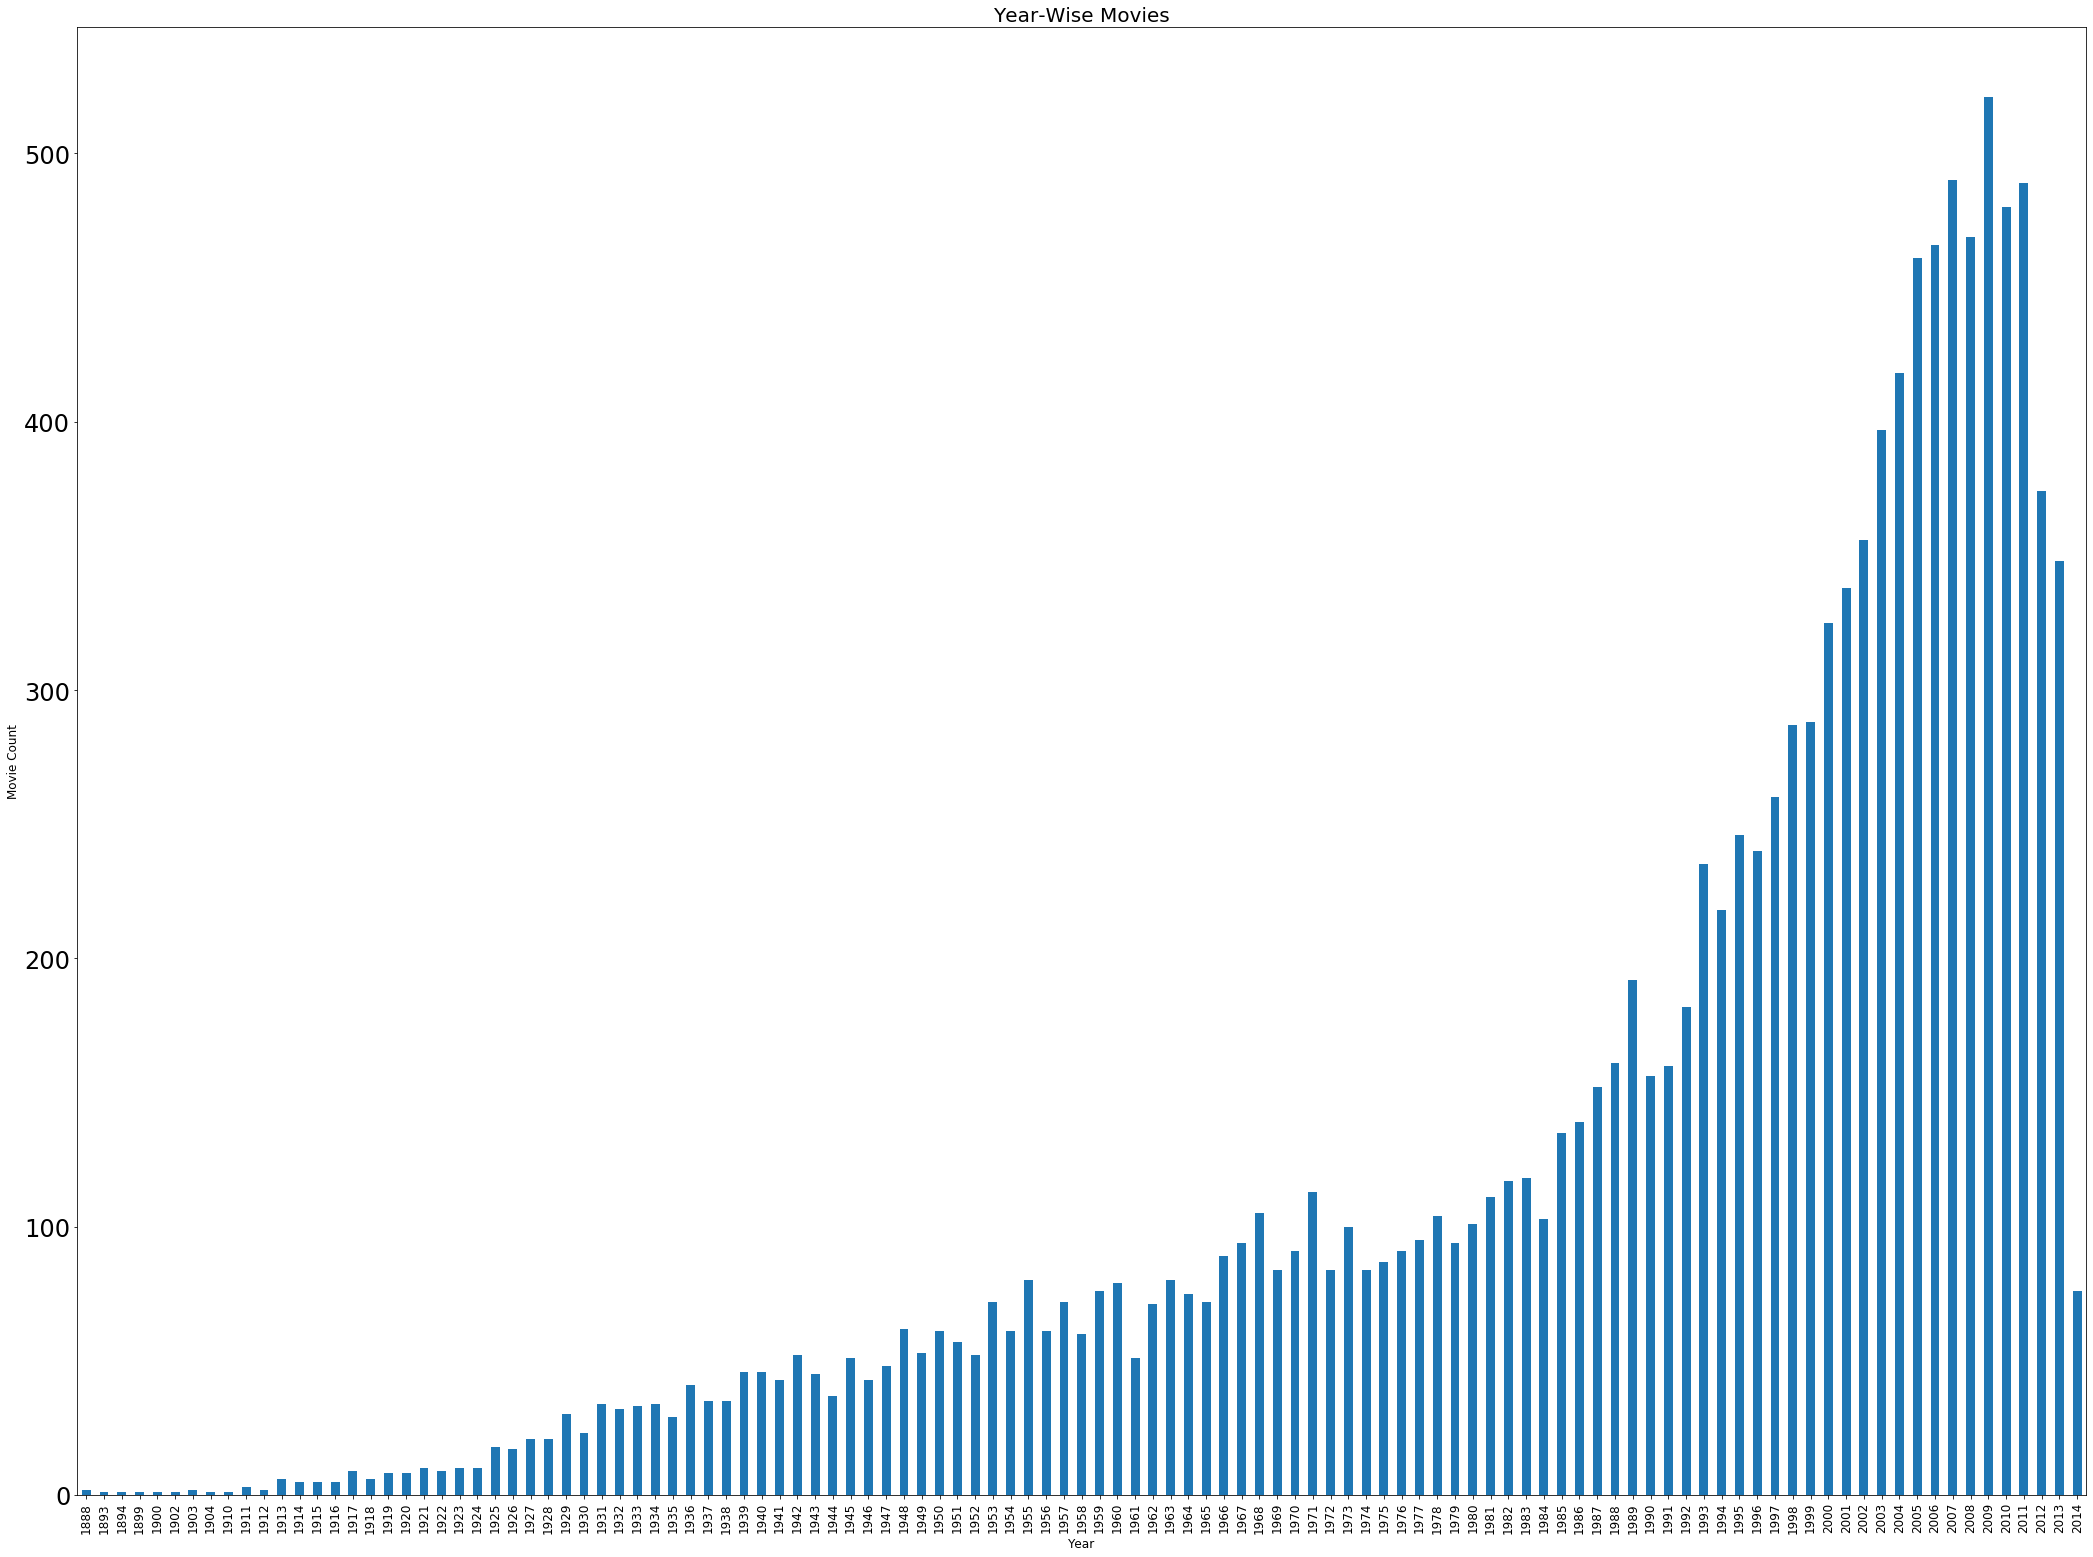

year
1888      2
1893      1
1894      1
1899      1
1900      1
       ... 
2010    480
2011    489
2012    374
2013    348
2014     76
Name: year, Length: 113, dtype: int64


In [24]:
#Lets plot the Year Wise Movie Count
plt.figure(figsize=(36,27))
data.groupby('year')['year'].count().plot(kind='bar')
plt.title('Year-Wise Movies',fontsize=20)
plt.yticks(fontsize=24)
plt.xticks(fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Movie Count',fontsize=12)
plt.show()
print(data.groupby('year')['year'].count())

### So IMDb has more number of reviews available for movies for last decade(2011-20) than any other time period. Hmm!!

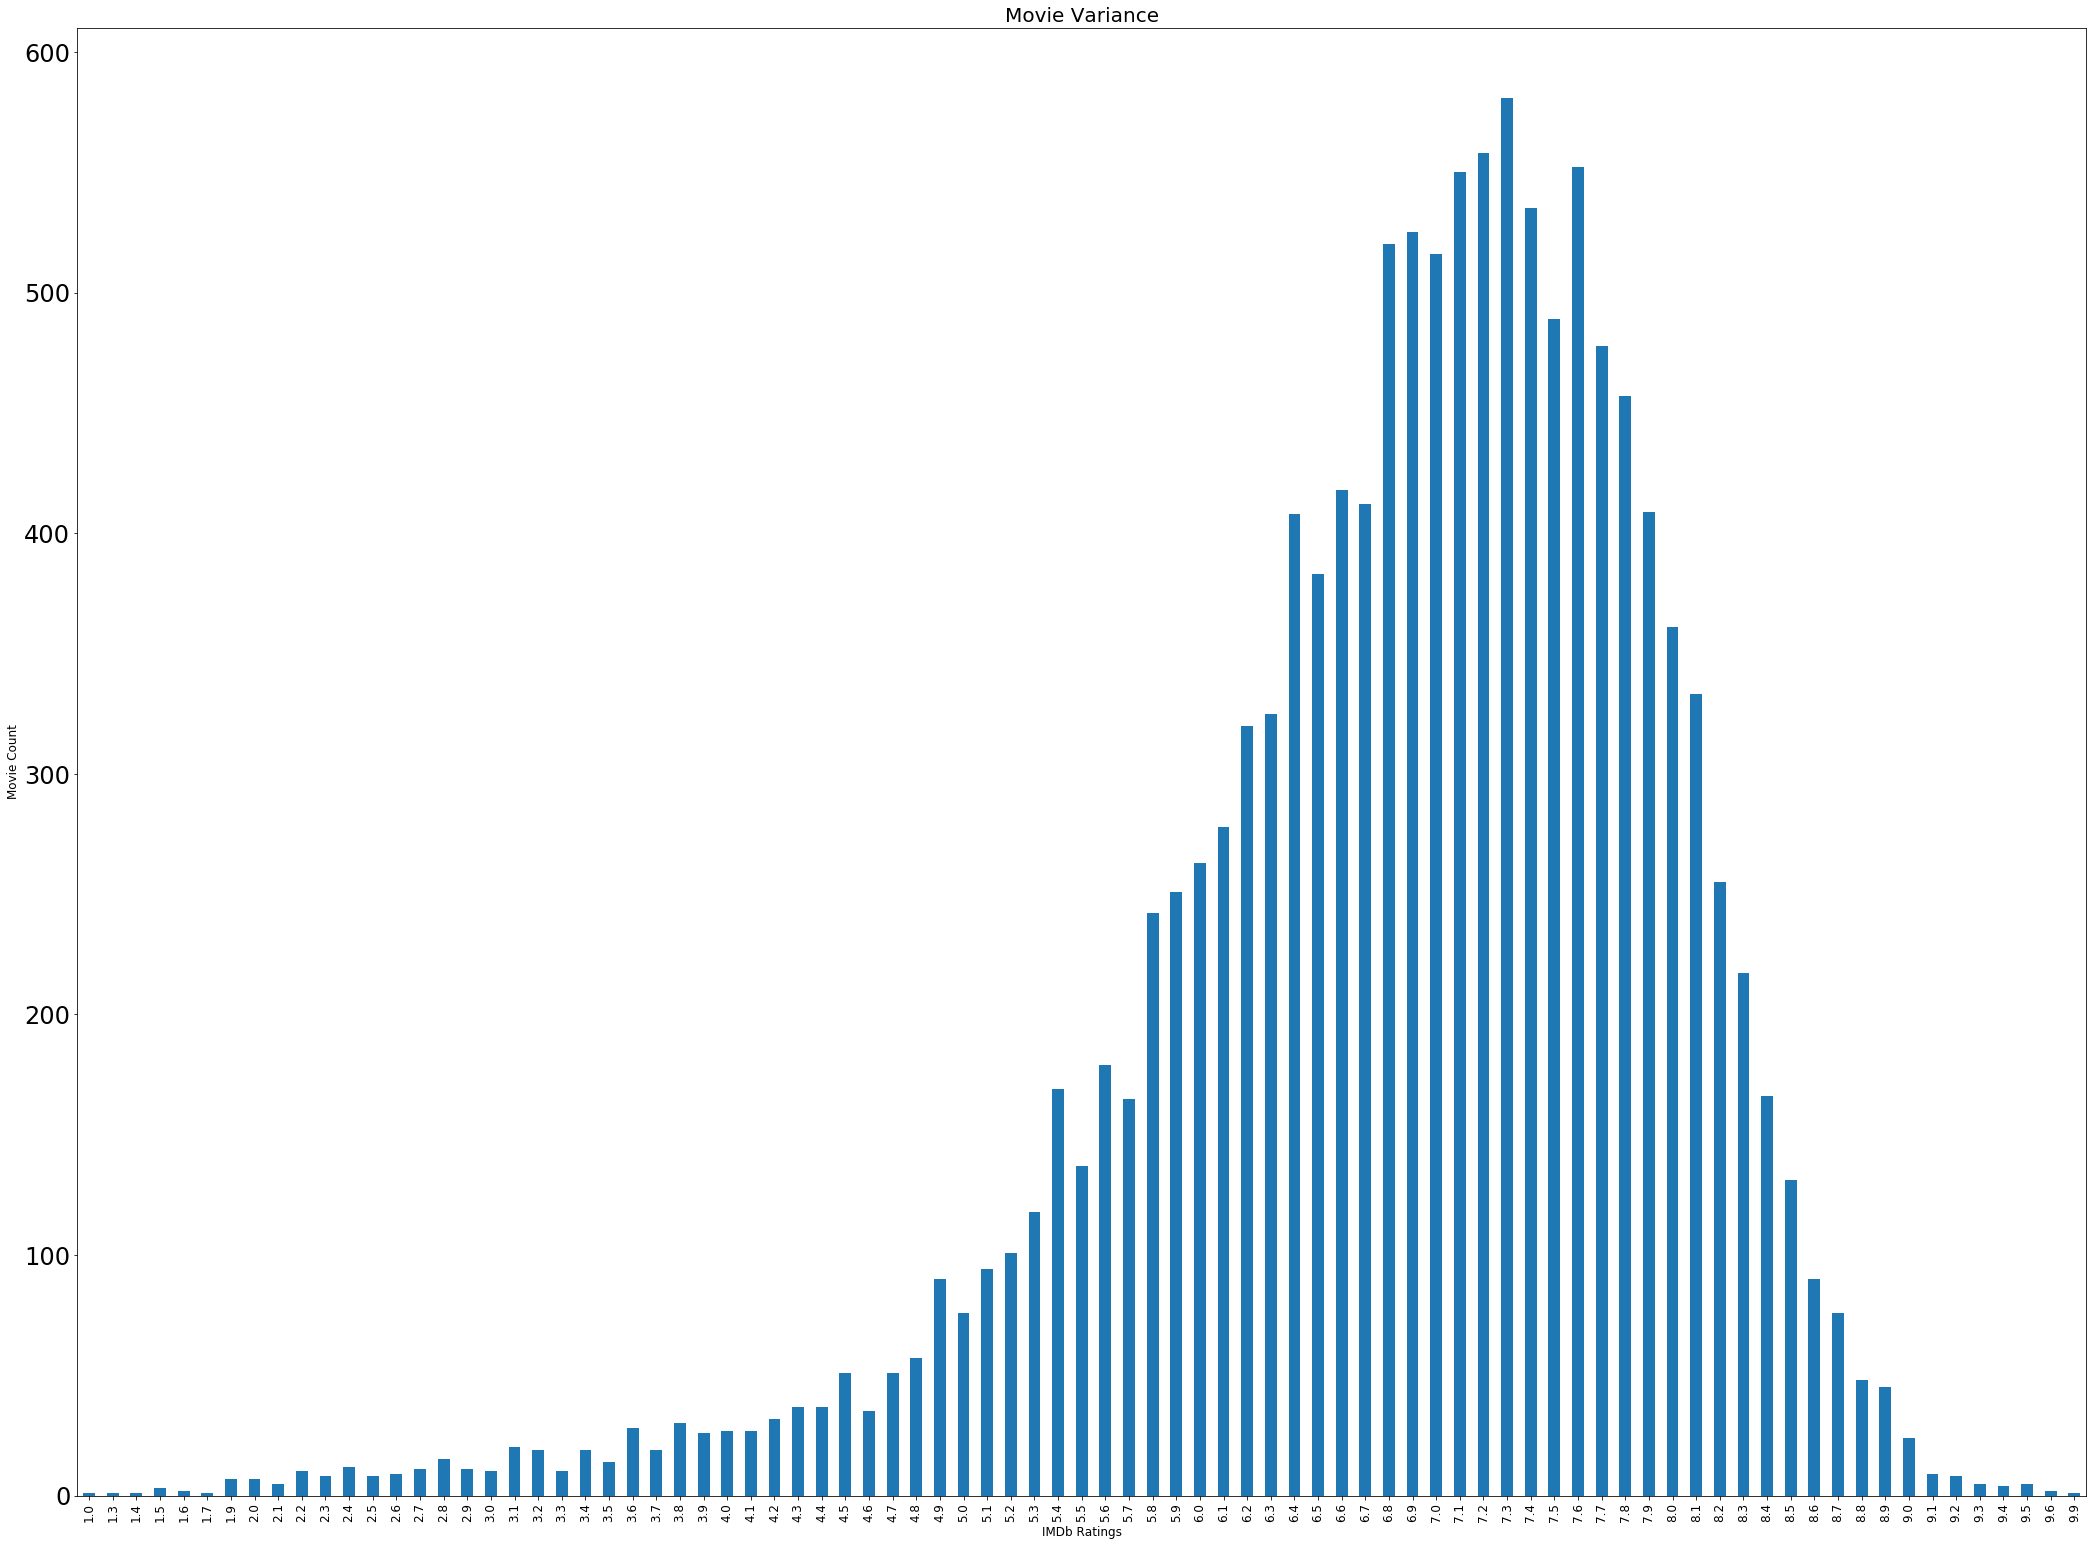

imdbRating
1.0    1
1.3    1
1.4    1
1.5    3
1.6    2
      ..
9.3    5
9.4    4
9.5    5
9.6    2
9.9    1
Name: imdbRating, Length: 85, dtype: int64


In [25]:
#Lets check the Movie count w.r.t Imdb Ratings
plt.figure(figsize=(36,27))
data.groupby('imdbRating')['imdbRating'].count().plot(kind='bar')
plt.title('Movie Variance',fontsize=20)
plt.yticks(fontsize=24)
plt.xticks(fontsize=12)
plt.xlabel('IMDb Ratings',fontsize=12)
plt.ylabel('Movie Count',fontsize=12)
plt.show()
print(data.groupby('imdbRating')['imdbRating'].count())

### Most of the ratings around that 7 region which kind of justifies the fact that 7 is actually an average number as far as rating is concerned.

# Data Preparation for Recommender System Pipeline

In [26]:
# Dropping the columns not using in my system.
data = data.drop(["nrOfGenre" , "nrOfPhotos", "nrOfNewsArticles", "nrOfUserReviews"], axis = 1)

In [27]:
#Now lets encode the type of the content.
data.type[data.type == 'video.movie'] = 2
data.type[data.type == 'video.tv'] = 1
data.type[data.type == 'video.episode'] = 0

C:\Users\bheru\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bheru\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bheru\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [28]:
data = data.drop(["duration"], axis =1)

## Creating the Acclamation Parameter

In [29]:
#Now to quantify the acclaimation index. Lets make a acclaimation index which is basically 0.5*NrNominations + NrWins
data["Acclaimation index"] = data["nrOfWins"] + 0.5*data["nrOfNominations"]

In [30]:
data["Acclaimation index"].values

array([1. , 2.5, 5. , ..., 0. , 0. , 0. ])

In [31]:
column_list = data.columns.tolist()

In [32]:
column_list

['title',
 'wordsInTitle',
 'imdbRating',
 'ratingCount',
 'year',
 'type',
 'nrOfWins',
 'nrOfNominations',
 'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'FilmNoir',
 'GameShow',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'RealityTV',
 'Romance',
 'SciFi',
 'Short',
 'Sport',
 'TalkShow',
 'Thriller',
 'War',
 'Western',
 'Acclaimation index']

In [33]:
# Now dropping the wins and nominations column
data = data.drop(["nrOfWins","nrOfNominations"], axis = 1)

In [34]:
#Now normalizing the ratings count for ease.
min_ratings = data["ratingCount"].min()
max_ratings = data["ratingCount"].max()
data["ratingCount"] = (data["ratingCount"] - min_ratings)/(max_ratings - min_ratings) 

In [35]:
data = data.drop(["wordsInTitle"] , axis = 1)

In [36]:
data = data.drop(["year"] , axis = 1)

## Now lets create a list index-wise which will contain the genres of the movies in an array form.

In [53]:
#Looking the columns we require for genre identification.
list(data.columns)


['title',
 'imdbRating',
 'ratingCount',
 'type',
 'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'FilmNoir',
 'GameShow',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'RealityTV',
 'Romance',
 'SciFi',
 'Short',
 'Sport',
 'TalkShow',
 'Thriller',
 'War',
 'Western',
 'Acclaimation index']

In [54]:
#We need columns from index 4 to index 31.
len(list(data.columns))

33

In [56]:
data

,title,imdbRating,ratingCount,type,Action,Adult,Adventure,Animation,Biography,Comedy,...,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,Acclaimation index
0,Der Vagabund und das Kind (1921),8.4,0.034262,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
1,Goldrausch (1925),8.3,0.038292,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2.5
2,Metropolis (1927),8.4,0.068449,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5.0
3,Der General (1926),8.3,0.031702,2,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1.5
4,Lichter der Großstadt (1931),8.7,0.059196,2,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,Parker Lewis - Der Coole von der Schule Parker...,7.6,0.000009,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
14327,Peep Show Sectioning (TV Episode 2005),7.7,0.000110,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
14328,Playhouse 90 The Miracle Worker (TV Episode 1957),7.3,0.000003,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
14329,Private Screenings Robert Mitchum and Jane Rus...,7.0,0.000013,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0


In [55]:
data.iloc[1,3]

2

In [81]:
Genre_Dict = []
for i in range(13040):
    genre_list = []
    for j in range(4,31):
        genre_list.append(data.iloc[1,j])
    Genre_Dict.append(np.array(genre_list))
Genre_Dict
    
        

[array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=

### Now the list named "Genre_Dict" will contain the arrays corresponding to the movie index.
### This is one of our first metric we will consider alongwith Acclamation Index of a movie.

### So as far as calculations goes.
### We have following quantities for distance measurements.
### 1. Acclaimation Distance
### 2. Genre Array distance.
### 3. Ratings Count Distance.
### 4. IMDb Rating
### 5. Type of content.

In [83]:
#Creating a dictionary of movie information vectors.
#A movie information vector will contain movie name,Acclaimation value, Genre array,type, Normalized ratings count and finally the IMDb rating.
movie_info_dict = {}
for i in range(13040):   
     movie_info_dict[i] = (data.iloc[i,0],data.iloc[i,-1],Genre_Dict[i],data.iloc[i,3],data.iloc[i,2],data.iloc[i,1])
    

In [84]:
#Checking our Movie Info Vector for 1st movie.
movie_info_dict[0]

('Der Vagabund und das Kind (1921)',
 1.0,
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 2,
 0.034261739578668064,
 8.4)

## Setting up the distance metric

In [92]:
from scipy import spatial
def ComputeDistance(a,b):
    AccA = a[1]
    AccB = b[1]
    Acclaimation_Distance = abs(AccA - AccB)
    TypeA = a[3]
    TypeB = b[3]
    Type_Distance = abs(TypeA - TypeB)
    PopularityA = a[4]
    PopularityB = b[4]
    Popularity_Distance = abs(PopularityA - PopularityB)
    GenreA = a[2]
    GenreB = b[2]
    Genre_Distance = spatial.distance.cosine(GenreA, GenreB)
    return Acclaimation_Distance + Type_Distance + Popularity_Distance + Genre_Distance

In [93]:
#For checking our prepared distance computing function.
ComputeDistance(movie_info_dict[1],movie_info_dict[3])

1.0065895435993206

### Since our distance computing function is prepared. We must know the lesser the distance, the more resemblance between the content. Hence it should be recommended.

In [102]:
#This is our distance calculation and the functon that will lend us our nearest neighbours.

import operator
def getNeighbors(i,K):
    distances = []
    for movie in movie_info_dict:
        if (movie != i):
            dist = ComputeDistance(movie_info_dict[i], movie_info_dict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

## Our Recommendation model is finally ready to predict or recommend.

# Recommedations

In [103]:
# Lets check the recommendations for movie with index no. 2707
movie_info_dict[2707]

("Wayne's World 2 (1993)",
 0.0,
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64),
 2,
 0.042205866197956715,
 6.1)

### Recommendations for the movie named "Wayne's World 2(1993)"

In [107]:
#Lets predict five recommendations for the mentioned movie.
K = 5
Average_Rating = 0
neighbors = getNeighbors(2707, K) # Toy Story (1995)
for neighbor in neighbors:
    Average_Rating += movie_info_dict[neighbor][5]
    print (movie_info_dict[neighbor][0] + " " + str(movie_info_dict[neighbor][5]))
Average_Rating /= K

Broken City (2013) 6.2
Snitch - Ein riskanter Deal (2013) 6.5
Rent A Man: Ein Mann für gewisse Sekunden (1999) 5.7
Die schrillen Vier auf Achse (1983) 7.4
To Rome with Love (2012) 6.3


#### Lets see whats the average rating of the movies recommended.

In [108]:
Average_Rating

6.419999999999999

#### Not bad considering our movie is rated 6.1